In [1]:
# Importing necessary packages
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Importing model
from ann_model import Model, Layer

2022-02-19 19:50:33.606897: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# Getting data
data = mnist.load_data()

# Splitting to train and test
X_train = np.array(data[0][0]).reshape(-1, 784)[:1000, :] / 255
X_test = np.array(data[1][0]).reshape(-1, 784)[:300, :] / 255

y_train = OneHotEncoder().fit_transform(data[0][1].reshape(-1, 1))[:1000, :]
y_test = OneHotEncoder().fit_transform(data[1][1].reshape(-1, 1))[:300, :]

In [3]:
# Building model
model = Model(learning_rate=0.07)
model.add(Layer(128, activation_function='relu'))
model.add(Layer(64, activation_function='relu'))
model.add(Layer(10, activation_function='softmax'))

In [4]:
# Fitting model
model.fit(X_train, y_train)

EPOCH 1
Accuracy: 0.49


EPOCH 2
Accuracy: 0.713


EPOCH 3
Accuracy: 0.813


EPOCH 4
Accuracy: 0.881


EPOCH 5
Accuracy: 0.92


EPOCH 6
Accuracy: 0.928


EPOCH 7
Accuracy: 0.957


EPOCH 8
Accuracy: 0.959


EPOCH 9
Accuracy: 0.967


EPOCH 10
Accuracy: 0.979




In [5]:
# Predictions
predictions = model.predict(X_test)

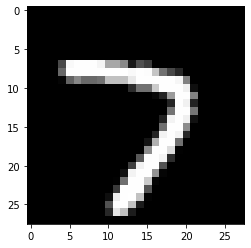

Prediction: 7


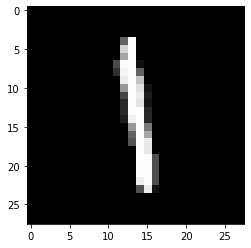

Prediction: 1


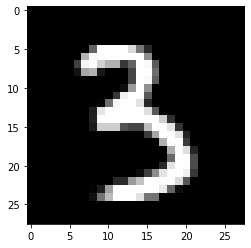

Prediction: 3


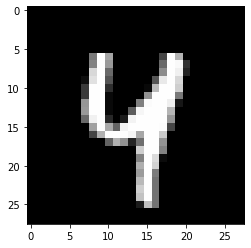

Prediction: 4


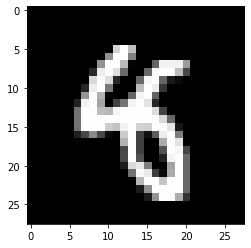

Prediction: 4


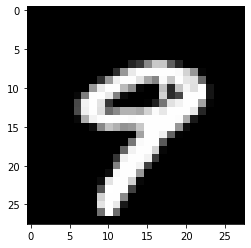

Prediction: 9


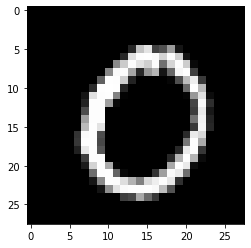

Prediction: 0


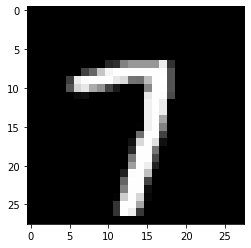

Prediction: 7


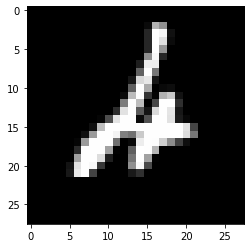

Prediction: 6


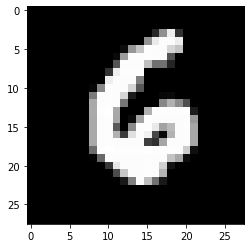

Prediction: 6


In [6]:
plt.gray()
for _ in range(10):
    random_no = np.random.randint(y_test.shape[0])
    plt.imshow(X_test[random_no].reshape(28, 28))
    plt.show()
    print(f"Prediction: {np.argmax(predictions.T[random_no])}")

In [7]:
# The accuracy for validation set is relatively very low. Could be fixed through various regularization methods.
accuracy_score(np.argmax(predictions.T, axis=1), np.argmax(y_test, axis=1))

0.7866666666666666

In [8]:
confusion_matrix(np.argmax(predictions.T, axis=1), np.argmax(y_test, axis=1))

array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  2,  0,  0,  1,  2,  0,  2],
       [ 0,  0,  1, 12,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1, 21,  1,  2,  0,  1,  1],
       [ 0,  0,  2,  3,  3, 24,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  5,  1, 21,  1,  3,  0],
       [ 0,  1,  0,  1,  0,  2,  0, 27,  1,  2],
       [ 1,  0,  0,  1,  0,  1,  0,  0, 14,  1],
       [ 0,  0,  1,  4,  8,  0,  0,  4,  0, 27]])